In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
#create a linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
X = df[['highway-mpg']]
Y = df['price']

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#Output of predicted Y for 1-5 different values of X
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
lm.intercept_


38423.305858157386

In [12]:
lm.coef_

array([-821.73337832])

In [14]:
#create another linear regression object
lm1 = LinearRegression()
lm1 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
X1 = df[['engine-size']]
Y1 = df['price']

In [20]:
lm1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lm1.intercept_

-7963.338906281049

In [22]:
lm1.coef_

array([166.86001569])

In [23]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [24]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.intercept_

-15806.624626329198

In [26]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [27]:
Z1 = df[['normalized-losses','highway-mpg']]

In [29]:
lm2 = LinearRegression()
lm2 
lm2.fit(Z1, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm2.intercept_

38201.31327245728

In [31]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [32]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48280.053146684615)

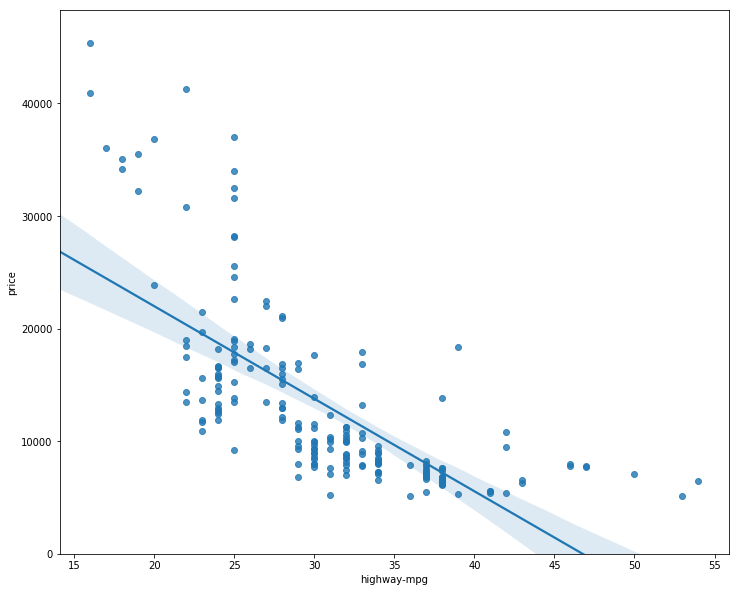

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

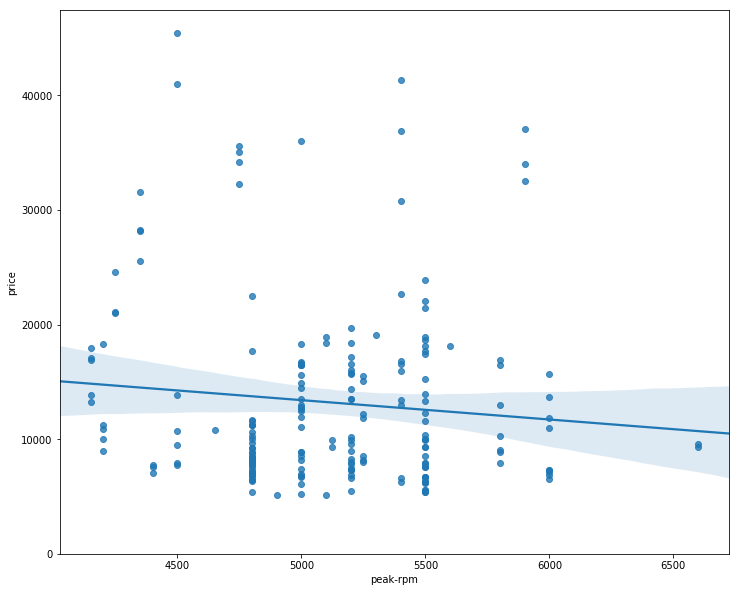

In [34]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [36]:
df[[ "peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [37]:
df[[ "highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


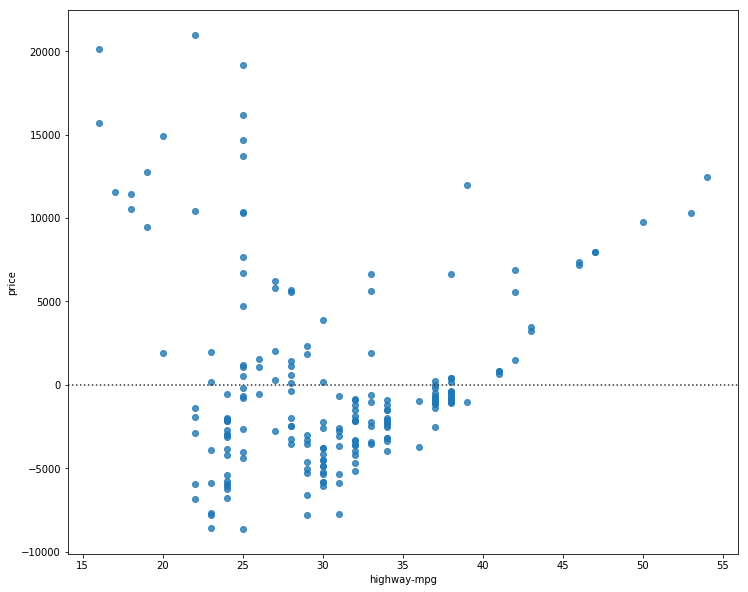

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [39]:
Y_hat = lm.predict(Z)

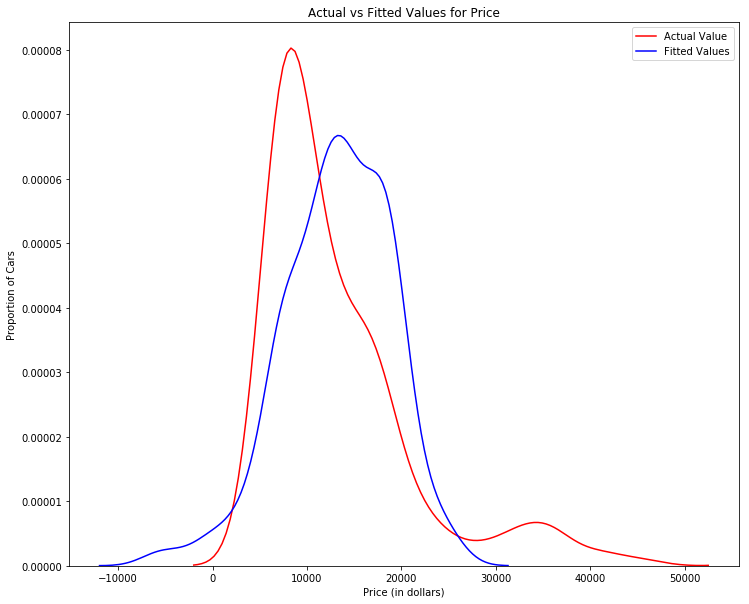

In [40]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [41]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x = df['highway-mpg']
y = df['price']

In [43]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


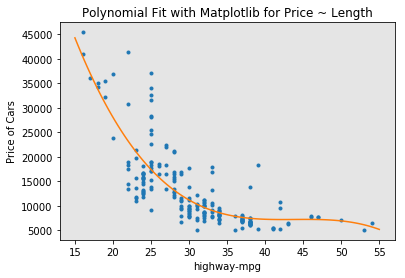

In [44]:
PlotPolly(p, x, y, 'highway-mpg')

In [45]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [46]:
np.polyfit(x, y, 11)

array([-1.24263316e-08,  4.72184605e-06, -8.02842989e-04,  8.05639804e-02,
       -5.29740648e+00,  2.39470176e+02, -7.58845247e+03,  1.68447142e+05,
       -2.56530978e+06,  2.55140444e+07, -1.49106857e+08,  3.87929800e+08])

In [47]:
# Here we use a polynomial of the 10th order (cubic) 
f = np.polyfit(x, y, 10)
p = np.poly1d(f)
print(p)

            10             9            8          7         6
-1.571e-08 x  + 6.724e-06 x - 0.001243 x + 0.1315 x - 8.837 x
          5             4             3             2
 + 395.1 x - 1.191e+04 x + 2.393e+05 x - 3.065e+06 x + 2.259e+07 x - 7.267e+07


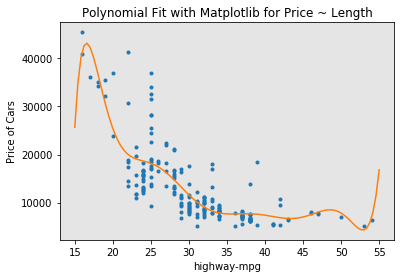

In [48]:
PlotPolly(p, x, y, 'highway-mpg')

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [51]:
Z_pr=pr.fit_transform(Z)

In [52]:
Z.shape

(201, 4)

In [53]:
#after transformation shape
Z_pr.shape

(201, 15)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
#We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [56]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [57]:
pipe.fit(Z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [58]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [59]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [60]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [61]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [64]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [65]:
Y_predict_multifit = lm.predict(Z)

In [66]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [67]:
from sklearn.metrics import r2_score

In [68]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6958454635410176


In [69]:
mean_squared_error(df['price'], p(x))

19113574.497739743

In [70]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [71]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [72]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

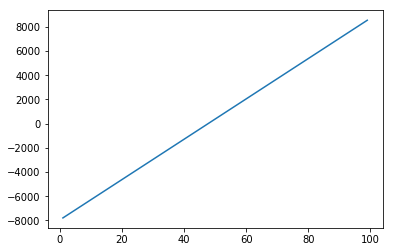

In [74]:
plt.plot(new_input, yhat)
plt.show()